In [1]:
import stock
from stock_model import NigModel

In [2]:
spy_weekly = stock.import_spy_weekly()
initial_model = NigModel.from_stock_moments(spy_weekly)
model = initial_model.reoptimize()

<Figure size 432x288 with 0 Axes>

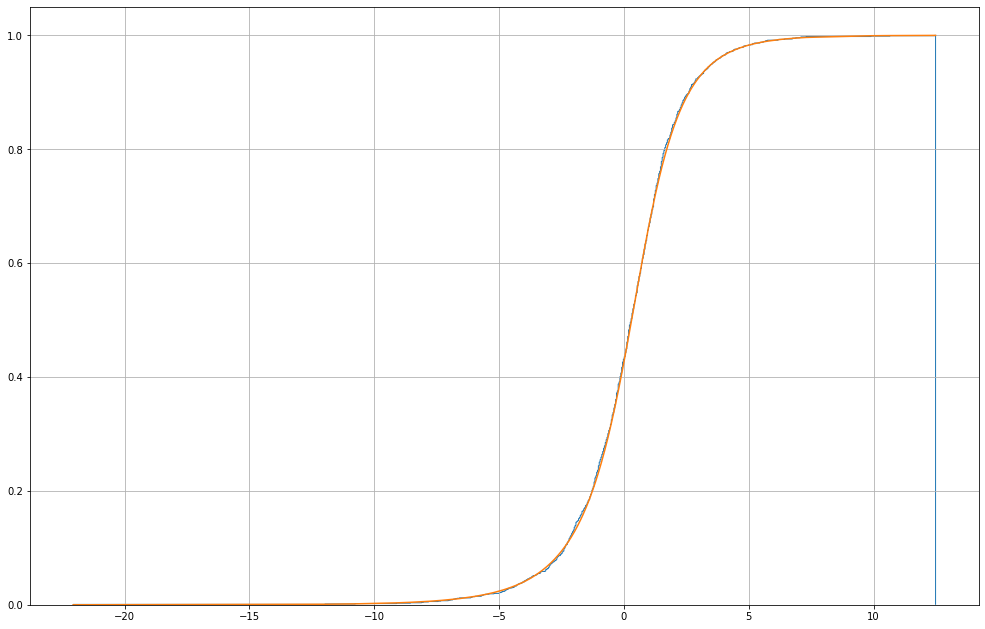

In [3]:
model.plot_comparison()

In [4]:
import numpy
from matplotlib import pyplot

<Figure size 432x288 with 0 Axes>

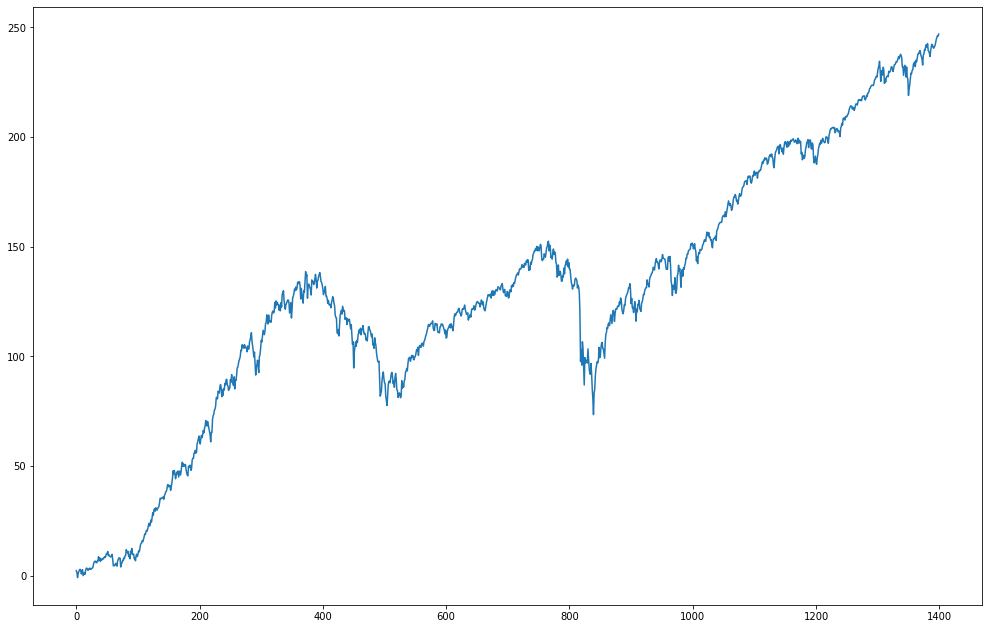

In [5]:
pyplot.clf()
pyplot.figure(figsize=(17,11)).patch.set_facecolor('white')
pyplot.plot(spy_weekly.log_pct_gain.to_numpy().cumsum())
pyplot.show()

<Figure size 432x288 with 0 Axes>

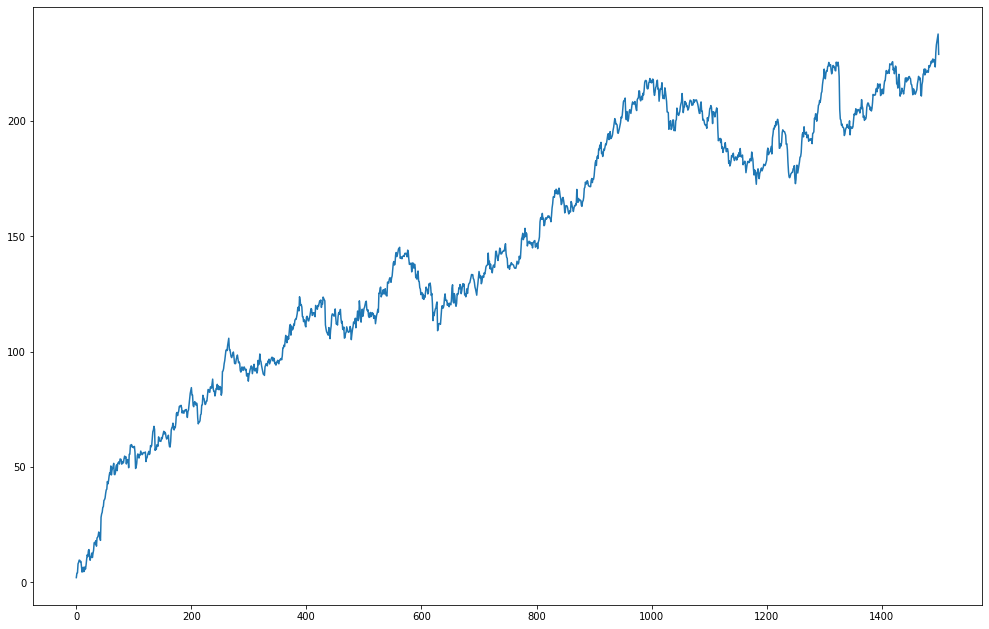

In [6]:
import math
numpy.random.seed()
fake_chart = numpy.array([model.dist.scipy_dist.rvs() for n in range(1500)]).cumsum()
pyplot.clf()
pyplot.figure(figsize=(17,11)).patch.set_facecolor('white')
pyplot.plot(fake_chart)
pyplot.show()